<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/Plucked_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuerda Vibrante de Extremos Fijos

### Plucked String.


Prof. Mario I. Caicedo

El problema del ''plucked string'' consiste en resolver el problema de Cauchy para una cuerda vibrante de extremos fijos sujeta a las condiciones iniciales:

$$u(x,0)=\begin{cases}\frac{h}{s}x\,,0<x<d\\h-\frac{h}{L-d}(x-d)\,,d<x<L\end{cases}$$

$$\dot{u}(x,0)=0$$

La técnica es sencilla, en vista de que la cuerda tiene exremos fijos, la solución general al problema de Cauchy es una expansión en modos de la forma

$$u(x,t)=\sum_{n=1}^{\infty}\left[a_ncos\left(n\omega_0t\right)+b_nsen\left(n\omega_0t\right)\right]sen\left(\frac{n\pi{}x}{L}\right)$$

Las condiciones iniciales implican $b_n=0$, $\forall{}n$ y los coeficientes $a_n$ se obtienen como los coeficientes de Fourier convencionales del desarollo

$$
u(x,0)=\sum_{n=1}^{\infty}\,a_n\,sen\left(\frac{n\pi{}x}{L}\right)
$$


El resultado es

$$u(x,t)=\sum_{n=1}^{\infty}\left[\frac{2h}{n^2\pi^2}\frac{L^2}{d(L-d)}sen\left(\frac{nd\pi}{L}\right)\right]sen\left(\frac{n\pi{}x}{L}\right)cos\left(2\pi\frac{nc}{2L}t\right)$$





## PROBLEMA: 

Reproduzca la solución analítica que se está usando en este cuaderno.

Referencia: https://www.acs.psu.edu/drussell/Demos/Pluck-Fourier/Pluck-Fourier.html

Bibliotecas

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Definiendo el modo

In [2]:
def coeff(n,h,d,L):
  
  A=2*h/(np.pi**2*n**2)

  B=L**2/(d*(L-d))

  C=np.sin(d*n*np.pi/L)

  return A*B*C

In [3]:
def omega(n,vel,L):

  Om=2.*np.pi*vel*n/L

  return Om

Parámetros 

In [4]:
h=1
d=4
L=16
vel=.5
Num_ters=20

In [5]:
def u(x,t,h,d,L,Num_ters):
    u=np.zeros(1000)
    for p in range(1,Num_ters):
      u = u+coeff(p,h,d,L)*np.sin(p*np.pi*x/L)*np.cos(omega(p,vel,L)*t)
    return u

* Creando la figura y los ejes

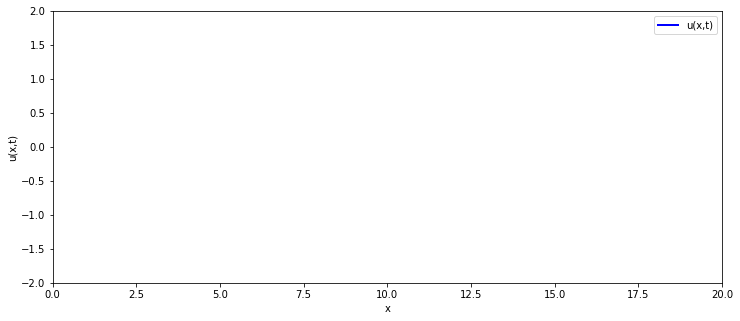

In [6]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)   

ax1.set_xlim(( 0, 20))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')

txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)

ax1.legend(['u(x,t)']);

* Animación

In [7]:
def init():
    line1.set_data([], [])
    return line1,

In [8]:
def drawframe(n):
    x = np.linspace(0, 20, 1000)
    
    y1 = u(x,n,h,d,L,Num_ters)
    
    line1.set_data(x, y1)
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return line1,
    

In [9]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
#anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [10]:
from IPython.display import HTML
HTML(anim.to_html5_video())